## 一. 导入模块

In [1]:
import json
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB  
from sklearn.naive_bayes import MultinomialNB  
from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter 
from sklearn.metrics import f1_score 
from imblearn.under_sampling import ClusterCentroids
from sklearn.tree import DecisionTreeClassifier  
from sklearn import svm  
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import BernoulliNB  
from sklearn.metrics import accuracy_score 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt  
import xgboost as xgb 
kf = StratifiedKFold(n_splits = 5,random_state=2023,shuffle=True)
# 用于交叉验证

## 二. 数据处理

主要处理字符串型数据和缺失数据以及不必要存在的数据（如序号ID之类）

In [2]:
df = pd.read_json('train.json')  # 训练数据
df_test = pd.read_json('test.json') # 用于预测
df_test_copy = pd.read_json('test.json') # 用于后续写入
df = pd.concat([df['user'].apply(pd.Series), df.drop('user', axis = 1)], axis = 1)
df_test = pd.concat([df_test['user'].apply(pd.Series), df_test.drop('user', axis = 1)], axis = 1)
df = df.drop('entities', axis = 1)
df_test = df_test.drop('entities', axis = 1)
df = df.drop(['utc_offset','time_zone'], axis = 1)
df_test = df_test.drop(['utc_offset','time_zone'], axis = 1)
#去除所有缺失的列
df = df.drop([column_obj for column_obj in df.columns if "url" in column_obj or "color" in column_obj], axis = 1)
df_test = df_test.drop([column_obj for column_obj in df_test.columns if "url" in column_obj or "color" in column_obj], axis = 1)
#去除所有包含url或者color的列

In [2]:
df = pd.read_json('train.json')  # 训练数据

In [3]:
df

,created_at,user,label
0,2019-01-20 03:36:01+00:00,"{'id': 1318284638, 'id_str': '1318284638', 'na...",bot
1,2019-01-21 21:36:00+00:00,"{'id': 17442457, 'id_str': '17442457', 'name':...",bot
2,2016-10-11 13:40:17+00:00,"{'id': 102069605, 'id_str': '102069605', 'name...",bot
3,2019-01-21 18:42:38+00:00,"{'id': 1367759732, 'id_str': '1367759732', 'na...",bot
4,2018-11-13 04:09:04+00:00,"{'id': 2927879268, 'id_str': '2927879268', 'na...",bot
...,...,...,...
1981,2017-07-16 15:45:38+00:00,"{'id': 464353156, 'id_str': '464353156', 'name...",human
1982,2019-01-21 21:55:19+00:00,"{'id': 214891135, 'id_str': '214891135', 'name...",human
1983,2019-01-21 02:41:37+00:00,"{'id': 247977754, 'id_str': '247977754', 'name...",human
1984,2019-01-21 12:52:24+00:00,"{'id': 274251944, 'id_str': '274251944', 'name...",human


In [4]:
df = pd.concat([df['user'].apply(pd.Series), df.drop('user', axis = 1)], axis = 1)

In [5]:
df

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,created_at,label
0,1318284638,1318284638,Syed Haider Naqvi,HNakvi,Islamabad,,None,{'description': {'urls': []}},False,28533,...,True,False,True,False,False,False,False,none,2019-01-20 03:36:01+00:00,bot
1,17442457,17442457,Cleveland Clinic MD,CleClinicMD,"Cleveland, Ohio, United States",News and insights for physicians and clinical ...,https://t.co/IxMra2OEey,{'url': {'urls': [{'url': 'https://t.co/IxMra2...,False,299192,...,True,False,False,False,False,False,False,none,2019-01-21 21:36:00+00:00,bot
2,102069605,102069605,2NE1 TV,2NE1tv,Seoul,We tweet about 2NE1's video and photo. It’s 2N...,None,{'description': {'urls': []}},False,89051,...,True,False,False,False,False,False,False,none,2016-10-11 13:40:17+00:00,bot
3,1367759732,1367759732,Alastair de kretser,Alastairkretser,England,"Travel, tech and stuff 😀",None,{'description': {'urls': []}},False,43211,...,True,True,False,False,False,False,False,none,2019-01-21 18:42:38+00:00,bot
4,2927879268,2927879268,Gran Horóscopo,GranHoroscopo,México - Argentina,Tu mejor prediccion diaria ORIGINAL para todos...,https://t.co/rDVUTyCn9E,{'url': {'urls': [{'url': 'https://t.co/rDVUTy...,False,113300,...,True,False,True,False,False,False,False,regular,2018-11-13 04:09:04+00:00,bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,464353156,464353156,Biα ♐️,Biia_Amaraal1,Artur Nogueira,👻 bia.amarall/ ♐️,None,{'description': {'urls': []}},False,912,...,True,True,False,False,False,False,False,none,2017-07-16 15:45:38+00:00,human
1982,214891135,214891135,Brooke Marie,BrookeMarieCam,🤱🏼,Welcome! I specialize in Adult (18+) Custom Vi...,https://t.co/uAZ5LhUnNT,{'url': {'urls': [{'url': 'https://t.co/uAZ5Lh...,False,113402,...,False,True,False,False,False,False,False,none,2019-01-21 21:55:19+00:00,human
1983,247977754,247977754,Bianca 🌴,biancabizb_,"Arauco, Chile",18 • 🐾💘,https://t.co/Qfnt0mOUG3,{'url': {'urls': [{'url': 'https://t.co/Qfnt0m...,False,1285,...,True,True,False,False,False,False,False,regular,2019-01-21 02:41:37+00:00,human
1984,274251944,274251944,Cameen,Cameen23,"New England, Brooklyn-NY",New England Music Awards Top five Artist Of Th...,https://t.co/vhcGaX7t9m,{'url': {'urls': [{'url': 'https://t.co/vhcGaX...,False,48561,...,True,False,False,False,False,False,False,none,2019-01-21 12:52:24+00:00,human


In [3]:
df.info() #展示数据信息，查看是否存在缺失值·

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            1986 non-null   int64              
 1   id_str                        1986 non-null   object             
 2   name                          1986 non-null   object             
 3   screen_name                   1986 non-null   object             
 4   location                      1986 non-null   object             
 5   description                   1986 non-null   object             
 6   protected                     1986 non-null   bool               
 7   followers_count               1986 non-null   int64              
 8   friends_count                 1986 non-null   int64              
 9   listed_count                  1986 non-null   int64              
 10  created_at                    1986 n

In [4]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df)) # 观察缺失情况

Part of missing values for every column
id                              0.0
id_str                          0.0
name                            0.0
screen_name                     0.0
location                        0.0
description                     0.0
protected                       0.0
followers_count                 0.0
friends_count                   0.0
listed_count                    0.0
created_at                      0.0
favourites_count                0.0
geo_enabled                     0.0
verified                        0.0
statuses_count                  0.0
lang                            0.0
contributors_enabled            0.0
is_translator                   0.0
is_translation_enabled          0.0
profile_background_tile         0.0
profile_use_background_image    0.0
has_extended_profile            0.0
default_profile                 0.0
default_profile_image           0.0
following                       0.0
follow_request_sent             0.0
notifications           

In [5]:
df = df.drop(['id','id_str','name','screen_name','created_at',
              'description','location','protected','follow_request_sent',
              'notifications','contributors_enabled'],axis=1)
df_test = df_test.drop(['id','id_str','name','screen_name','created_at',
              'description','location','protected','follow_request_sent',
              'notifications','contributors_enabled'],axis=1)
# 去除一些没有必要且难以处理的列

In [6]:
i = 0
dict_lang = {}
for obj in set(list(df["lang"])) :
    dict_lang[obj] = i
    i += 1
def fun_change(arg):
    if arg == True or arg == "regular" or arg == "human":
        return 1
    elif arg == False or arg == "none" or arg == "bot":
        return 0
    elif arg == "badged" :
        return -1
    else :
        return arg
def fun_change_lang(arg):
    if arg in dict_lang.keys():
        return dict_lang[arg]
    elif type(arg) == str :
        return -1
    else :
        return float(arg)
# 以上用于字典映射，将离散的字符映射到连续的正整数
df = df.applymap(fun_change)
df_test = df_test.applymap(fun_change)
df = df.applymap(fun_change_lang)
df_test = df_test.applymap(fun_change_lang)
# 将其全部转化为数字类型

In [148]:
df

,followers_count,friends_count,listed_count,favourites_count,geo_enabled,verified,statuses_count,lang,is_translator,is_translation_enabled,profile_background_tile,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,translator_type,label
0,28533.0,1164.0,45.0,6006.0,1.0,0.0,7446.0,8,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,299192.0,1721.0,1517.0,401.0,1.0,1.0,25344.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,89051.0,743.0,307.0,154.0,0.0,0.0,47479.0,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43211.0,237.0,29.0,358.0,0.0,0.0,16586.0,8,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,113300.0,16422.0,112.0,37.0,1.0,0.0,70666.0,14,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,912.0,439.0,0.0,1594.0,1.0,0.0,30501.0,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1982,113402.0,85.0,452.0,15349.0,0.0,0.0,35623.0,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1983,1285.0,944.0,7.0,5568.0,1.0,0.0,39747.0,14,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1984,48561.0,16802.0,56.0,4425.0,1.0,0.0,6917.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 三. 相关性分析

<AxesSubplot:>

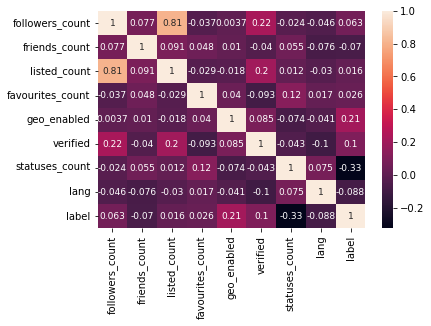

In [7]:
temp_df = df[["followers_count","friends_count","listed_count",
             "favourites_count","geo_enabled","verified","statuses_count","lang","label"]]
corr=temp_df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':9})
# 观察特征的相关性

<AxesSubplot:>

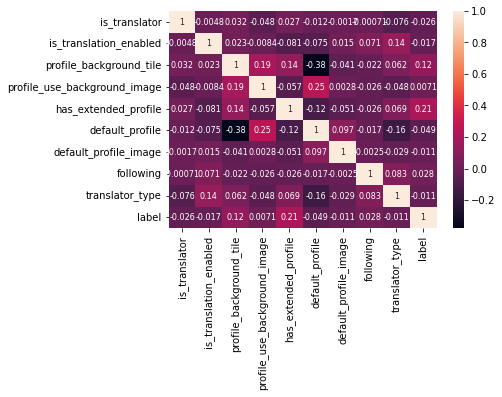

In [8]:
temp_df = df[["is_translator","is_translation_enabled","profile_background_tile","profile_use_background_image",
              "has_extended_profile","default_profile","default_profile_image","following","translator_type","label"]]
corr=temp_df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':8})

## 四. Label属性预测

### 多重感知机

以下我们全部使用交叉验证的方式

In [14]:
def neur_(chosen_list,data,n,m,max_iter_,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        mlp=MLPClassifier(activation='logistic', alpha=0, hidden_layer_sizes=(m, n), random_state=1,max_iter=max_iter_) #构造神经网络
        mlp.fit(X_train,y_train)
        y_pred = mlp.predict(X_test) 
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [16]:
aver_neur,list_pred_neur,list_test_pred = neur_(["listed_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang",
       "has_extended_profile"],df,20,20,1000,5)
print(aver_neur)

Accuracy: 0.731156
F1-score: 0.780287
Accuracy: 0.770781
F1-score: 0.810811
Accuracy: 0.755668
F1-score: 0.804829
Accuracy: 0.795970
F1-score: 0.836364
Accuracy: 0.740554
F1-score: 0.782241
[0.7588256142171816, 0.8029063820298618]


### 决策树

In [149]:
def DecisionTree(chosen_list,data,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=16, max_depth=6, random_state = 2024) 
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [150]:
aver_DecisionTree,list_pred_DecisionTree,list_test_pred = DecisionTree(
    [ "listed_count","favourites_count","geo_enabled","statuses_count"],df,5)
print(aver_DecisionTree)

Accuracy: 0.746231
F1-score: 0.785563
Accuracy: 0.730479
F1-score: 0.770878
Accuracy: 0.745592
F1-score: 0.792608
Accuracy: 0.785894
F1-score: 0.829659
Accuracy: 0.732997
F1-score: 0.775424
[0.7482386744807158, 0.79082628546949]


### 逻辑回归

In [12]:
def LogisticRegression_(chosen_list,data,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf =  LogisticRegression(penalty='l1', C=0.9, solver='liblinear')  
        clf.fit(X_train,y_train) 
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [13]:
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_(["favourites_count","geo_enabled","verified","statuses_count",
       "is_translation_enabled","profile_background_tile",
       "has_extended_profile","following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.748744
F1-score: 0.793388
Accuracy: 0.768262
F1-score: 0.814516
Accuracy: 0.763224
F1-score: 0.813492
Accuracy: 0.780856
F1-score: 0.827723
Accuracy: 0.748111
F1-score: 0.793388
[0.7618394238193487, 0.8085015648611362]


### 支持向量机

In [74]:
def Svm_(chosen_list,data,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf = svm.SVC(kernel='poly',random_state=32, degree=1) # 使用线性核函数
        # clf = svm.SVC(kernel='rbf',random_state=32, gamma=0.016)
        # clf = svm.SVC(kernel='sigmoid',random_state=32)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test) #利用预测集进行预测
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [75]:
aver_Svm,list_pred_Svm,list_test_pred = Svm_([ "followers_count","friends_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang","is_translation_enabled","profile_background_tile",
       "has_extended_profile"],df,5)
print(aver_Svm)

Accuracy: 0.738693
F1-score: 0.793651
Accuracy: 0.758186
F1-score: 0.813230
Accuracy: 0.755668
F1-score: 0.811650
Accuracy: 0.768262
F1-score: 0.823077
Accuracy: 0.740554
F1-score: 0.793587
[0.75227269850512, 0.8070389896995487]


### Xgboost

In [124]:
def Xgboost_(chosen_list,data,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf = xgb.XGBRegressor(objective='binary:logistic',colsample_bytree=0.5, learning_rate=0.2,  
                         max_depth=15, alpha=5, n_estimators=150,random_state=32)  
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test) #利用预测集进行预测
        y_pred = [int(temp+0.5) for temp in y_pred]
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [125]:
aver_Xgboost,list_pred_Xgboost,list_test_pred = Xgboost_(["followers_count","friends_count","listed_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang","is_translator","is_translation_enabled","profile_background_tile",
       "has_extended_profile",
       "default_profile_image","following","translator_type"],df,5)
print(aver_Xgboost)

Accuracy: 0.791457
F1-score: 0.823028
Accuracy: 0.780856
F1-score: 0.812903
Accuracy: 0.788413
F1-score: 0.826446
Accuracy: 0.826196
F1-score: 0.855950
Accuracy: 0.748111
F1-score: 0.785408
[0.787006822525727, 0.8207469692572097]


### 贝叶斯分类器

In [146]:
def bayes_Ber_(chosen_list,data,k_fold) :
    X=np.array(data[chosen_list])
    y=np.array(data["label"])
    scaler = StandardScaler()
    ave_f1_score,acc_aver=0,0
    list_test_pred,list_pred_neur = [],[]
    for train,valid in kf.split(X,y) :
        X_train=np.array(X)[train]
        y_train=np.array(y)[train]
        X_test =np.array(X)[valid]
        y_test=np.array(y)[valid]
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        clf = BernoulliNB()   
        #clf = GaussianNB()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test) #利用预测集进行预测
        y_pred = [int(temp+0.5) for temp in y_pred]
        ave_f1_score+=f1_score(y_test, y_pred)
        acc_aver+=accuracy_score(y_test, y_pred)
        print('Accuracy: %f' % accuracy_score(y_test, y_pred))
        print('F1-score: %f' % f1_score(y_test, y_pred))
        list_pred_neur.append(y_pred)
        list_test_pred.append(y_test)
    return [acc_aver/k_fold,ave_f1_score/k_fold],list_pred_neur,list_test_pred

In [147]:
aver_bayes_Ber,list_pred_bayes_Ber,list_test_pred = bayes_Ber_([
       "followers_count","favourites_count",
       "geo_enabled","verified","statuses_count",
       "has_extended_profile","default_profile",
       ],df,5)
print(aver_bayes_Ber)

Accuracy: 0.723618
F1-score: 0.763948
Accuracy: 0.758186
F1-score: 0.799163
Accuracy: 0.710327
F1-score: 0.760915
Accuracy: 0.775819
F1-score: 0.816495
Accuracy: 0.740554
F1-score: 0.783158
[0.7417009480652633, 0.7847358357565646]


## 五. 预测test数据集并进行降维可视化

观察以上各种模型通过交叉验证得到的平均准确率和f1分数，我们最终决定使用Xgboost模型

In [162]:
def D_redu(chosen_list, df, df_test) :
    scaler = StandardScaler()
    X_train=np.array(df[chosen_list])
    y_train=np.array(df["label"])
    X_test =np.array(df_test[chosen_list])
    y_test=np.array(df_test["label"])
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    clf = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.15,  
                           max_depth=5, alpha=5, n_estimators=45,random_state=32)  
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array([int(temp+0.5) for temp in y_pred])
    # 以上进行Xgboost模型预测
    for i in range(len(y_pred)) :
        if y_pred[i] == 1 :
            df_test_copy.loc[i,"label"] = "human"
        else :
            df_test_copy.loc[i,"label"] = "bot"
    df_json_write = df_test_copy.to_json(orient='records')
    with open('test.json', 'w') as file:  
        file.write(df_json_write)
    # 以上将预测写入文件
    x = np.array(df_test[chosen_list])
    ts = TSNE(n_components=2)
    ts.fit_transform(x)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.scatter(ts.embedding_[y_pred == 0,0],ts.embedding_[y_pred == 0,1])
    plt.scatter(ts.embedding_[y_pred == 1,0],ts.embedding_[y_pred == 1,1])
    # 降维，提取出两个主成分之后画图

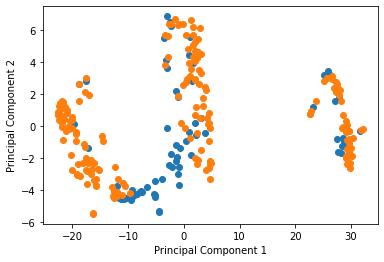

In [163]:
D_redu([
       "followers_count","friends_count","listed_count",
       "favourites_count","geo_enabled","verified","statuses_count",
       "lang","is_translator","is_translation_enabled","profile_background_tile",
       "has_extended_profile",
       "default_profile_image","following","translator_type"],df,df_test)

## 六. 猜想验证模块

In [164]:
# 剔除"statuses_count"
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_([
       "favourites_count","geo_enabled","verified",
       "is_translation_enabled","profile_background_tile",
       "has_extended_profile","following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.633166
F1-score: 0.685345
Accuracy: 0.619647
F1-score: 0.679406
Accuracy: 0.624685
F1-score: 0.682303
Accuracy: 0.677582
F1-score: 0.724138
Accuracy: 0.627204
F1-score: 0.683761
[0.6364568434110096, 0.6909903468812472]


In [165]:
# 剔除"geo_enabled"
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_([
       "favourites_count","verified","statuses_count",
       "is_translation_enabled","profile_background_tile",
       "has_extended_profile","following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.738693
F1-score: 0.789474
Accuracy: 0.763224
F1-score: 0.812000
Accuracy: 0.758186
F1-score: 0.813953
Accuracy: 0.775819
F1-score: 0.824458
Accuracy: 0.727960
F1-score: 0.775934
[0.7527764768426515, 0.8031636752458977]


In [169]:
# 剔除"has_extended_profile"
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_([
       "favourites_count","verified","statuses_count","geo_enabled",
       "is_translation_enabled","profile_background_tile",
       "following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.728643
F1-score: 0.778689
Accuracy: 0.760705
F1-score: 0.811881
Accuracy: 0.740554
F1-score: 0.800774
Accuracy: 0.778338
F1-score: 0.826772
Accuracy: 0.727960
F1-score: 0.778689
[0.7472399782286748, 0.7993607170466325]


In [170]:
# 剔除"profile_background_tile"
aver_LogisticRegression,list_pred_LogisticRegression,list_test_pred = LogisticRegression_([
       "favourites_count","verified","statuses_count","geo_enabled",
       "is_translation_enabled",
       "following"],df,5)
print(aver_LogisticRegression)

Accuracy: 0.726131
F1-score: 0.781563
Accuracy: 0.745592
F1-score: 0.800000
Accuracy: 0.735516
F1-score: 0.795322
Accuracy: 0.768262
F1-score: 0.819608
Accuracy: 0.750630
F1-score: 0.796715
[0.7452261306532664, 0.7986414371744204]


In [176]:
mean_df = df.mean()
centred_df = df.sub(mean_df,axis=1)
cov_centred_df = np.dot(centred_df.T,centred_df)
PCA_eigenvalues,PCA_eigenvector = np.linalg.eigh(cov_centred_df)

In [177]:
PCA_eigenvalues

array([9.84680463e-01, 1.89372126e+00, 1.17317456e+01, 6.44318940e+01,
       1.44236493e+02, 1.95435784e+02, 2.75957994e+02, 3.61447481e+02,
       3.89780124e+02, 4.50590668e+02, 4.84220010e+02, 7.31150304e+02,
       2.19364854e+04, 2.41621489e+11, 3.12545336e+12, 1.78706861e+13,
       4.96459428e+13, 9.51543137e+16])